<a href="https://colab.research.google.com/github/nathalycristinabaltazarbautist-spec/Proyecto/blob/main/Entregable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EJERCICIO 1:

Dimensiones del conjunto de entrenamiento: (60000, 28, 28)
Dimensiones del conjunto de prueba: (10000, 28, 28)



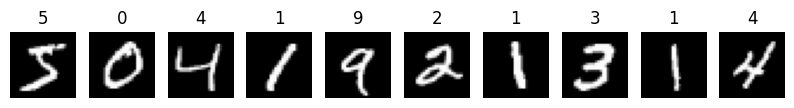

In [26]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", x_train.shape)
print("Dimensiones del conjunto de prueba:", x_test.shape)
print("")

# Visualizar los ejemplos
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

EJERCICIO 2:

In [27]:
from tensorflow.keras.utils import to_categorical

# Normalizamos los píxeles (0 a 255 → 0 a 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertirtimos las etiquetas a formato one-hot
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Ejemplo etiqueta original:", y_train[0])
print("Ejemplo etiqueta one-hot:", y_train_cat[0])

Ejemplo etiqueta original: 5
Ejemplo etiqueta one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


EJERCICIO 3:

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Reducimos el tiempo de entrenamiento
X_train_svm = x_train[:10000].reshape(10000, -1)
y_train_svm = y_train[:10000]
X_test_svm = x_test.reshape(x_test.shape[0], -1)

# Entrenamos el modelo
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_svm, y_train_svm)

# Evaluaamos la exactitud
y_pred_svm = clf.predict(X_test_svm)
print("La exactitud del modelo SVM es de:", accuracy_score(y_test, y_pred_svm))


La exactitud del modelo SVM es de: 0.9594


EJERCICIO 4:

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

mlp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mlp = mlp.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

loss, acc = mlp.evaluate(x_test, y_test_cat)
print("\nExactitud del modelo MLP:", acc)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8160 - loss: 0.6470 - val_accuracy: 0.9628 - val_loss: 0.1362
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9548 - loss: 0.1520 - val_accuracy: 0.9720 - val_loss: 0.1064
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9685 - loss: 0.1028 - val_accuracy: 0.9730 - val_loss: 0.0902
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0730 - val_accuracy: 0.9775 - val_loss: 0.0778
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9830 - loss: 0.0554 - val_accuracy: 0.9780 - val_loss: 0.0798
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0446 - val_accuracy: 0.9807 - val_loss: 0.0716
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0349 - val_accuracy: 0.9783 - val_loss: 0.0773
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9793 - val_

EJERCICIO 5:

In [41]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Cargar y preparar los datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Modelo
model_adam = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_adam.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

print("\nEntrenando modelo con ADAM...")
history_adam = model_adam.fit(x_train, y_train_cat,
                              epochs=20, batch_size=128,
                              validation_split=0.1)

loss, acc = model_adam.evaluate(x_test, y_test_cat)
print(f"Precisión final (ADAM): {acc*100:.2f}%")

model_adam.save("modelo_adam.keras")
print("Guardado: modelo_adam.keras")



Entrenando modelo con ADAM...
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8189 - loss: 0.6162 - val_accuracy: 0.9650 - val_loss: 0.1230
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9514 - loss: 0.1618 - val_accuracy: 0.9755 - val_loss: 0.0873
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9663 - loss: 0.1131 - val_accuracy: 0.9778 - val_loss: 0.0739
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9730 - loss: 0.0881 - val_accuracy: 0.9793 - val_loss: 0.0735
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9773 - loss: 0.0729 - val_accuracy: 0.9787 - val_loss: 0.0715
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9800 - loss: 0.0632 - val_accuracy: 0.9812 - val_loss: 0.0689
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9839 - loss: 0.0517 - val_accuracy: 0.9812 - val_loss: 0.0669
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9841 - 

In [42]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

model_sgd = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_sgd.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nEntrenando modelo con SGD...")
history_sgd = model_sgd.fit(x_train, y_train_cat,
                            epochs=25, batch_size=128,
                            validation_split=0.1)

loss, acc = model_sgd.evaluate(x_test, y_test_cat)
print(f"Precisión final (SGD): {acc*100:.2f}%")

model_sgd.save("modelo_sgd.keras")
print("Guardado: modelo_sgd.keras")



Entrenando modelo con SGD...
Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7111 - loss: 0.9347 - val_accuracy: 0.9445 - val_loss: 0.2003
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9222 - loss: 0.2712 - val_accuracy: 0.9620 - val_loss: 0.1438
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9408 - loss: 0.2006 - val_accuracy: 0.9672 - val_loss: 0.1157
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9519 - loss: 0.1612 - val_accuracy: 0.9712 - val_loss: 0.1012
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9609 - loss: 0.1355 - val_accuracy: 0.9762 - val_loss: 0.0889
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9661 - loss: 0.1153 - val_accuracy: 0.9768 - val_loss: 0.0809
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9705 - loss: 0.1017 - val_accuracy: 0.9773 - val_loss: 0.0814
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9702 - l

In [43]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

model_rms = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_rms.compile(optimizer=RMSprop(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\nEntrenando modelo con RMSprop...")
history_rms = model_rms.fit(x_train, y_train_cat,
                            epochs=20, batch_size=128,
                            validation_split=0.1)

loss, acc = model_rms.evaluate(x_test, y_test_cat)
print(f"Precisión final (RMSprop): {acc*100:.2f}%")

model_rms.save("modelo_rms.keras")
print("Guardado: modelo_rms.keras")



Entrenando modelo con RMSprop...
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8342 - loss: 0.5530 - val_accuracy: 0.9602 - val_loss: 0.1353
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9513 - loss: 0.1598 - val_accuracy: 0.9748 - val_loss: 0.0868
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9637 - loss: 0.1172 - val_accuracy: 0.9777 - val_loss: 0.0773
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0876 - val_accuracy: 0.9788 - val_loss: 0.0736
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9765 - loss: 0.0729 - val_accuracy: 0.9815 - val_loss: 0.0666
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0638 - val_accuracy: 0.9800 - val_loss: 0.0718
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9811 - loss: 0.0572 - val_accuracy: 0.9810 - val_loss: 0.0722
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9838

EJERCICIO 6:

In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Ajustar forma para CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)

loss, acc = cnn.evaluate(x_test_cnn, y_test_cat)
print("\nLa exactitud de la CNN es:", acc)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.8548 - loss: 0.5172 - val_accuracy: 0.9782 - val_loss: 0.0757
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9806 - loss: 0.0637 - val_accuracy: 0.9877 - val_loss: 0.0527
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.9863 - loss: 0.0446 - val_accuracy: 0.9895 - val_loss: 0.0378
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9907 - loss: 0.0293 - val_accuracy: 0.9887 - val_loss: 0.0450
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9900 - val_loss: 0.0329
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9860 - val_loss: 0.0521
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9918 - val_loss: 0.0351
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accurac

EJERCICIO 7:

In [45]:
from tensorflow.keras.layers import Dropout, BatchNormalization

cnn2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn2.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.7749 - loss: 0.8203 - val_accuracy: 0.6823 - val_loss: 1.0369
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.9609 - loss: 0.1180 - val_accuracy: 0.9858 - val_loss: 0.0510
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9739 - loss: 0.0807 - val_accuracy: 0.9893 - val_loss: 0.0374
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - accuracy: 0.9778 - loss: 0.0682 - val_accuracy: 0.9907 - val_loss: 0.0356
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9820 - loss: 0.0576 - val_accuracy: 0.9905 - val_loss: 0.0304
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9839 - loss: 0.0492 - val_accuracy: 0.9902 - val_loss: 0.0321
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9851 - loss: 0.0457 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.9846 - loss: 0.0461 - 

EJERCICIO 8:

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train_cnn)

cnn2.fit(datagen.flow(x_train_cnn, y_train_cat, batch_size=128),
         epochs=10, validation_data=(x_test_cnn, y_test_cat))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - accuracy: 0.9338 - loss: 0.2235 - val_accuracy: 0.9887 - val_loss: 0.0348
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9643 - loss: 0.1155 - val_accuracy: 0.9923 - val_loss: 0.0250
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9700 - loss: 0.0933 - val_accuracy: 0.9920 - val_loss: 0.0255
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9717 - loss: 0.0913 - val_accuracy: 0.9914 - val_loss: 0.0255
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9740 - loss: 0.0821 - val_accuracy: 0.9909 - val_loss: 0.0265
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9742 - loss: 0.0833 - val_accuracy: 0.9913 - val_loss: 0.0244
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9768 - loss: 0.0769 - val_accuracy: 0.9905 - val_loss: 0.0273
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9775 - loss: 0.0740 - val

EJERCICIO 9:

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



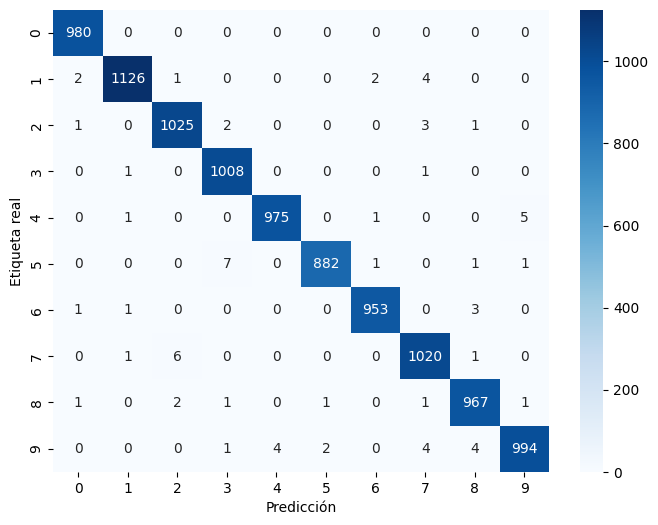

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_pred = cnn2.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print("Reporte de clasificación:\n", classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()


EJERCICIO 10:

In [48]:
cnn2.save("modelo_mnist.h5")
print("Modelo guardado como modelo_mnist.h5")

from tensorflow.keras.models import load_model
modelo_cargado = load_model("modelo_mnist.h5")
loss, acc = modelo_cargado.evaluate(x_test_cnn, y_test_cat)
print("Precisión del modelo cargado:", acc)


Modelo guardado como modelo_mnist.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9915 - loss: 0.0240
Precisión del modelo cargado: 0.9929999709129333


EJERCICIO 11:

In [49]:
!pip install flask flask-ngrok

In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

model = load_model("modelo_mnist.h5")

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    image = Image.open(file).convert('L')
    image = image.resize((28, 28))
    image = np.array(image).astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)

    prediction = np.argmax(model.predict(image))
    return jsonify({'prediccion': int(prediction)})

app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.12/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            